# **Project: Vehicle Insurance prediction**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import r2_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,classification_report

In [5]:
#Load the dataset
data = pd.read_csv('data.csv')

In [6]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
# make a copy of data
df=data.copy()
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [8]:
df.shape

(381109, 12)

In [9]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Exploratory Data Analysis

In [13]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [14]:
df['Response'].value_counts()

,count
Response,
0,334399
1,46710




* Customers not interested in taking the vehicle insurance are quite high.

* Out of 381109 customers, 334399 are not interested and 46710 are interested.



In [ ]:
df.groupby(['Gender']).sum()['Response']

,Response
Gender,
Female,18185
Male,28525


<Axes: title={'center': 'Response Sum by Gender'}, ylabel='Response'>

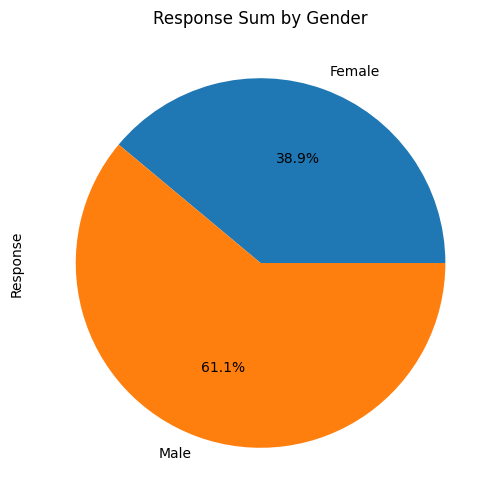

In [ ]:
# Plotting the pie chart
df.groupby(['Gender']).sum()['Response'].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), title='Response Sum by Gender')
# Group by 'Gender', sum 'Response', and then plot



* Males are more interested in taking vehicle insurance than
  females.
* No. of males interested in vehicle insurance : 28525
  No. of Females interested in vehicle insurance : 18185   



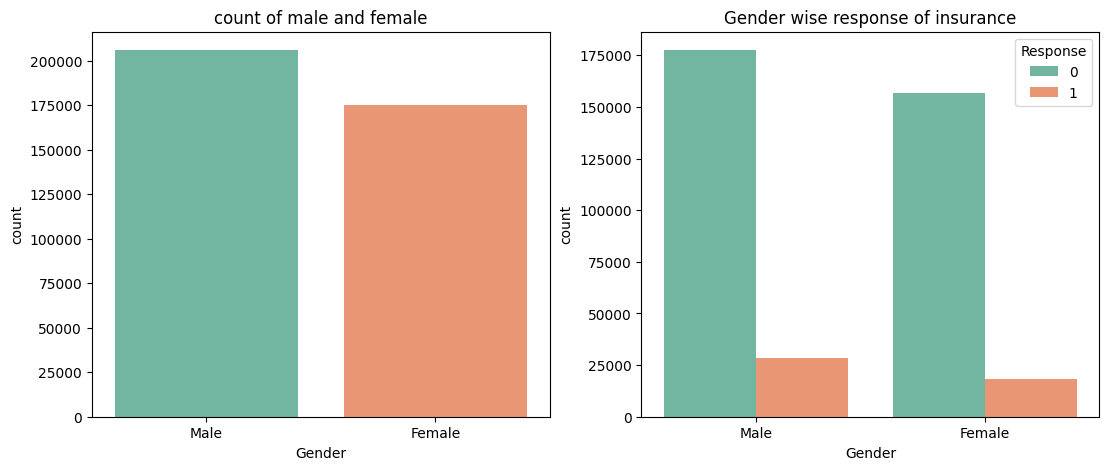

In [ ]:
# gender wise vehicle insurance response
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=df, palette="Set2")
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(x='Gender', hue='Response', data=df, palette="Set2" )
plt.title("Gender wise response of insurance")
plt.show()

In [ ]:
df.groupby(['Vehicle_Age']).sum()['Response']

,Response
Vehicle_Age,
1-2 Year,34806
< 1 Year,7202
> 2 Years,4702


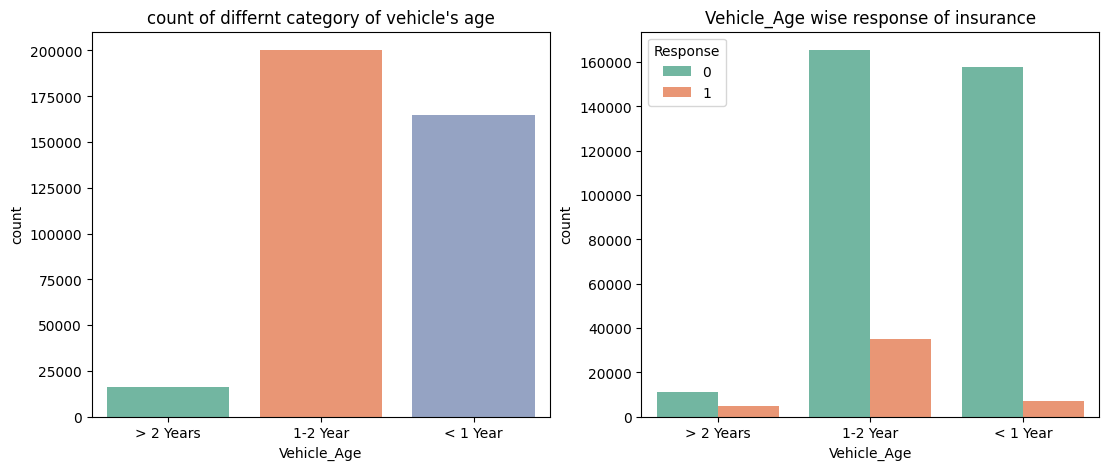

In [ ]:
# Vehicle Age wise vehicle insurance response
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x=df['Vehicle_Age'],palette="Set2")
plt.title("count of differnt category of vehicle's age")
plt.subplot(1,2,2)
sns.countplot(x=df['Vehicle_Age'], hue = df['Response'],palette="Set2")
plt.title("Vehicle_Age wise response of insurance")
plt.show()



*  List item Customers with Vehicle age in 1-2 years category are quite high
   compare to >2 years.

* Customers with Vehicle age in 1-2 years are found to be
  more interested in opting for insurance.



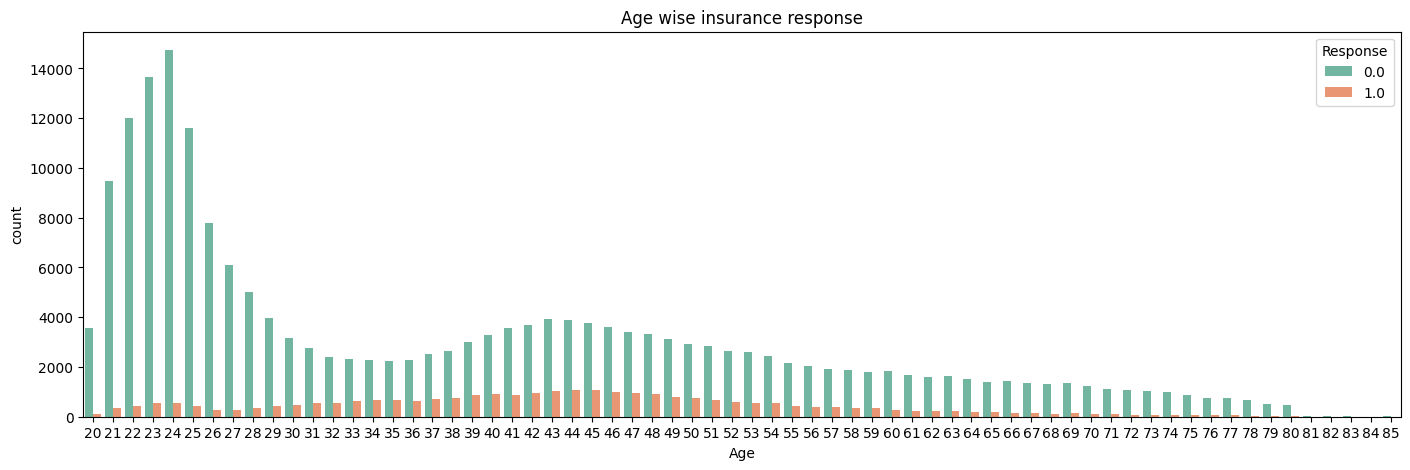

In [ ]:
# Age wise Insurance Response
plt.figure(figsize=(17,5))
sns.countplot(x='Age',hue='Response',data=data, palette='Set2')
plt.title('Age wise insurance response')
plt.savefig('Age wise insurance response.jpg',bbox_inches='tight',dpi=200)
plt.show()



* Customers below 30 and above 60 years are not
  interested in buying vehicle insurance.
* Age group between 30-60 years are most likely to buy
  insurance.



In [ ]:
df.groupby(['Driving_License']).sum()['Response']

,Response
Driving_License,
0,41
1,46669


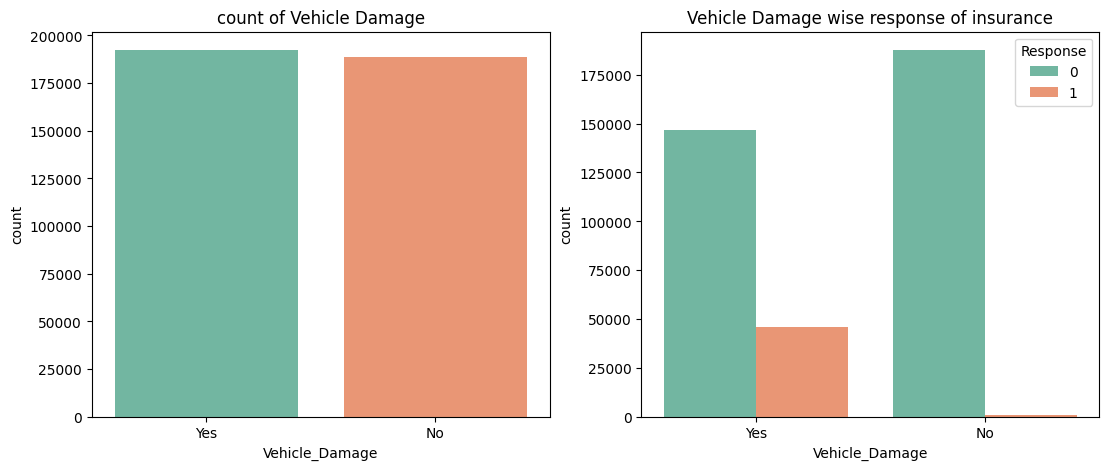

In [ ]:
# Vehicle Damage wise vehicle insurance response
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(x='Vehicle_Damage',data=df,palette='Set2')
plt.title("count of Vehicle Damage")
plt.subplot(1,2,2)
sns.countplot(x='Vehicle_Damage', hue = 'Response',data=df,palette="Set2")
plt.title("Vehicle Damage wise response of insurance")

plt.show()



*  Customers with Damaged and non-damaged vehicles are  
   almost equal in count.
*  Customers with Damaged vehicles  are more likely to buy
   insurance.



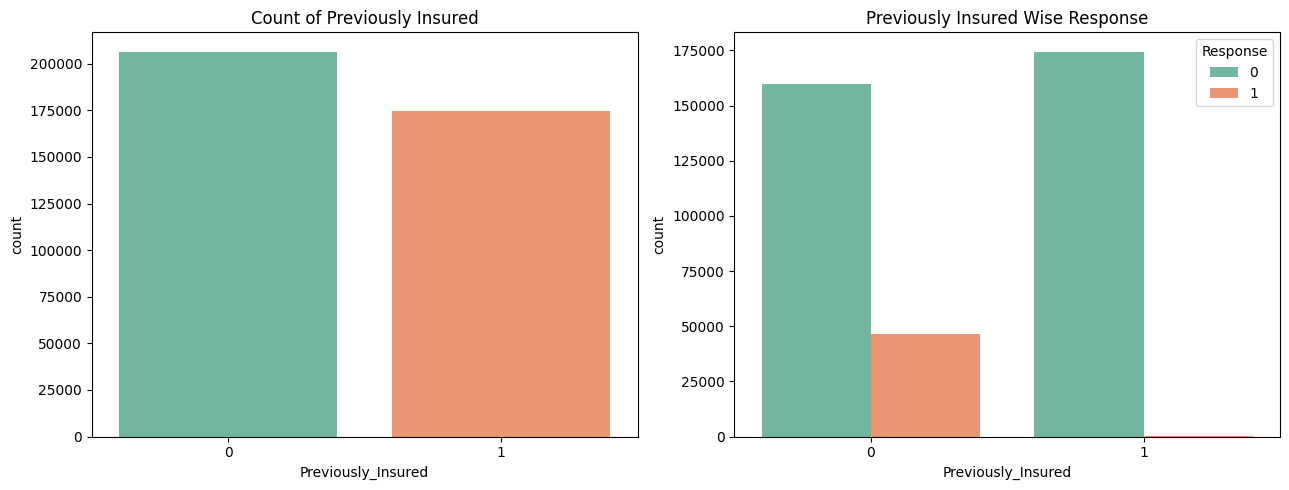

In [ ]:
# Previously_Insured wise vehicle insurance response
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot the countplot on the first axis
sns.countplot(x='Previously_Insured', data=df, palette='Set2', ax=ax1)
ax1.set_title("Count of Previously Insured")

# Plot the countplot with hue on the second axis
sns.countplot(x='Previously_Insured', data=df, hue='Response', palette='Set2', ax=ax2)
ax2.set_title("Previously Insured Wise Response")

# Display the plots
plt.tight_layout()
plt.show()



*   Customers who are not previously insured are likely to buy the insurance.




Text(0.5, 1.05, 'Pearson correlation of Features')

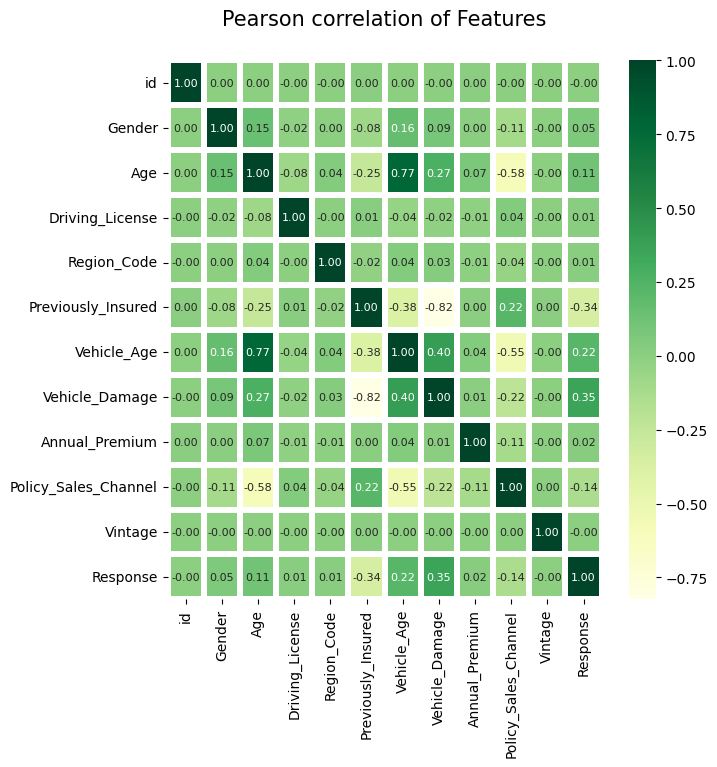

In [ ]:
# corelation of the features

corr = df.corr()

f, ax = plt.subplots(figsize=(7,7))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn',fmt=".2f", annot_kws={"size": 8}   )
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.title("Pearson correlation of Features", y=1.05, size=15)

# Encoding Categorical Variables

In [15]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])  # Yes=1, No=0
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])  # Yes=1, No=0

In [16]:
#Map vehicle age to ordered values
vehicle_age_map = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
df['Vehicle_Age'] = df['Vehicle_Age'].map(vehicle_age_map)

In [17]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


# Feature Selection

In [18]:
# ID can be dropped from the dataset as it does not have anything to with the response of the customers
df1 = df.drop('id',axis=1)
x=df1.iloc[:,:10]
y=df1.iloc[:,-1:]

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC_FIT = ETC.fit(x,y)
print(ETC_FIT.feature_importances_)

[0.00468949 0.14670923 0.00046951 0.10426278 0.04920208 0.01996532
 0.08074692 0.24680769 0.0694201  0.27772688]


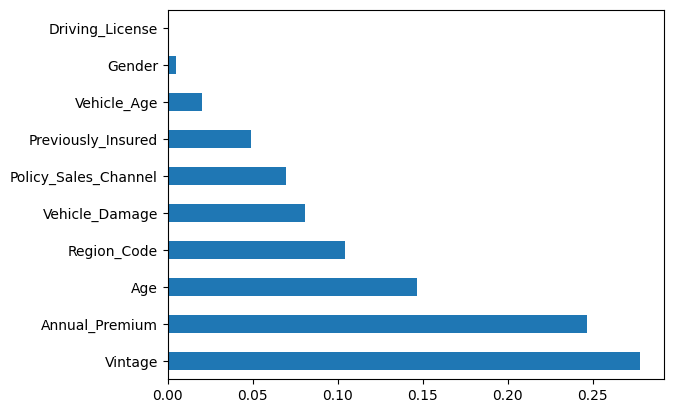

In [21]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(ETC_FIT.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()



*  Diriving License and gender has not important features here. both can be dropped from the data, should not impact the result.



In [22]:
x=x.drop(['Gender','Driving_License'],axis=1)
x.head()

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,0,2,1,40454.0,26.0,217
1,76,3.0,0,1,0,33536.0,26.0,183
2,47,28.0,0,2,1,38294.0,26.0,27
3,21,11.0,1,0,0,28619.0,152.0,203
4,29,41.0,1,0,0,27496.0,152.0,39


# Handling the data

1. The data is highly imbalance.
2. Huge difference between the datsets, resampling should be done.

In [23]:
!pip install imblearn

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
# resampling the data
rs=  RandomOverSampler()
x1,y1=rs.fit_resample(x,y)

In [ ]:
y1.value_counts()

,count
Response,
0,334399
1,334399


In [ ]:
y.value_counts()

,count
Response,
0,334399
1,46710


Original dataset shape Counter({'Response': 1})
Resampled dataset shape Counter({'Response': 1})


<Axes: xlabel='Response', ylabel='count'>

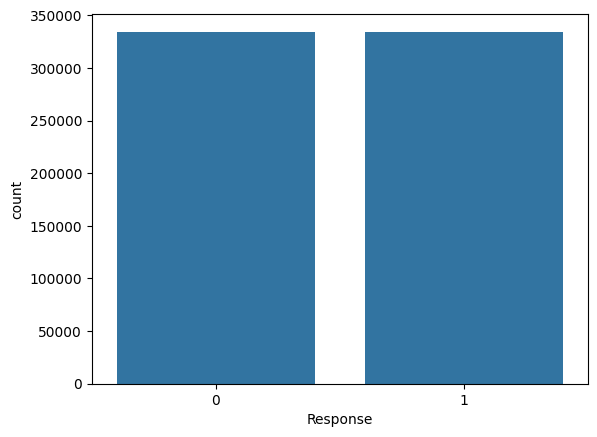

In [ ]:
from collections import Counter
counter_y=Counter(y)
counter_y1=Counter(y1)
print('Original dataset shape {}'.format(counter_y))
print('Resampled dataset shape {}'.format(counter_y1))
sns.countplot(data=y1,x='Response')

In [ ]:
x1.shape, y1.shape

((668798, 8), (668798, 1))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2, random_state=1)

In [ ]:
x_train.shape,x_test.shape

((535038, 8), (133760, 8))

In [ ]:
y_train.shape,y_test.shape

((535038, 1), (133760, 1))

# Standardization of data

In [ ]:
# Standardization of data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Model Building



 Problem can be identified as binary classification. Models used to best fit the data are:

1.   Logistic Regression
1.   Decision Tree
2.   Random Forest







## Logistic Regression




Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66847
           1       0.71      0.98      0.82     66913

    accuracy                           0.78    133760
   macro avg       0.83      0.78      0.78    133760
weighted avg       0.83      0.78      0.78    133760

Confusion Matrix:
 [[39517 27330]
 [ 1583 65330]]
ROC-AUC Score: 0.8326645417092827


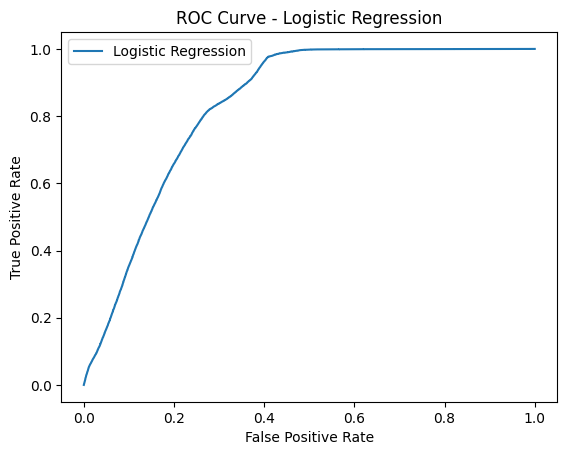

In [ ]:

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Predict
y_pred_lr = log_reg.predict(x_test)
y_prob_lr = log_reg.predict_proba(x_test)[:, 1]

# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

##Decision Tree

 Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.89      0.68      0.77     66847
           1       0.74      0.91      0.82     66913

    accuracy                           0.80    133760
   macro avg       0.82      0.80      0.80    133760
weighted avg       0.82      0.80      0.80    133760

Confusion Matrix:
 [[45782 21065]
 [ 5753 61160]]
ROC-AUC Score: 0.8551942600156508


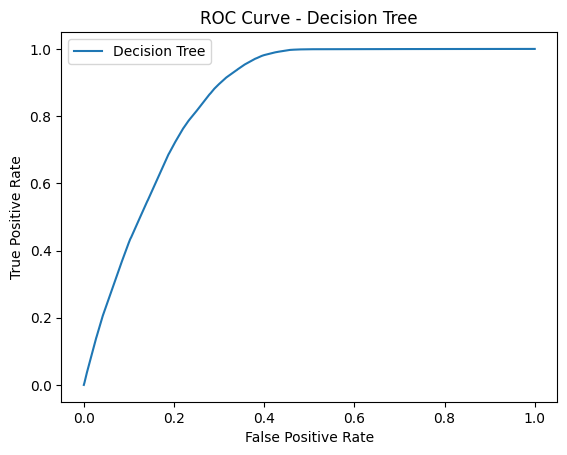

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt = DecisionTreeClassifier(max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini',
    random_state=42)
dt.fit(x_train, y_train)

# Predict
y_pred_dt = dt.predict(x_test)
y_prob_dt = dt.predict_proba(x_test)[:, 1]

# Evaluation
print(" Decision Tree Classifier")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr, tpr, label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

##Random Forest

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     66847
           1       0.79      0.99      0.88     66913

    accuracy                           0.86    133760
   macro avg       0.88      0.86      0.86    133760
weighted avg       0.88      0.86      0.86    133760

Confusion Matrix:
 [[48957 17890]
 [  865 66048]]
ROC-AUC Score: 0.9297591056796332


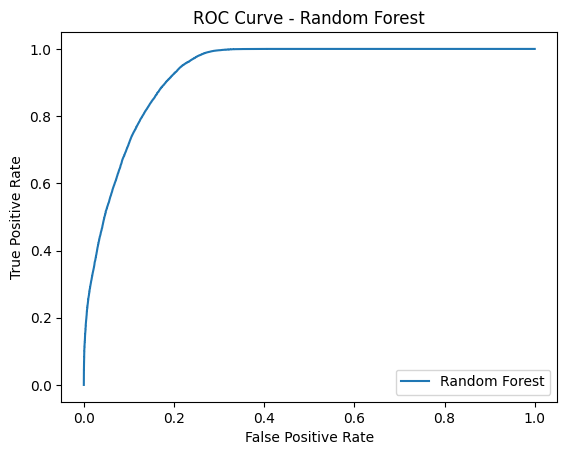

In [ ]:

for d in [10, 15, 20]:
    for n in [100, 150]:
        rf = RandomForestClassifier(max_depth=d, n_estimators=n, random_state=42)

rf.fit(x_train, y_train)

# Predict
y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:, 1]

# Evaluation
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [ ]:
model=rf
print("Train Accuracy:", model.score(x_train, y_train))
print("Test Accuracy:", model.score(x_test, y_test))


Train Accuracy: 0.8782721974887765
Test Accuracy: 0.8597861842105263
